<center>
<h1>Supervised Learning: Non parametric models</h1>
<br />
<em>Support materials</em>
    <br /><br />
    Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>)
    <br /><br />
    New York University
</center>

In [1]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [17]:
%%javascript
Reveal.addEventListener("slidechanged", function(event){ window.location.hash = "header"; });

<IPython.core.display.Javascript object>

# Decision trees

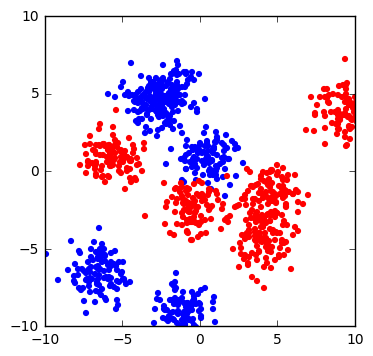

In [19]:
# Generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=10, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 5))

# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label, linewidths=0)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

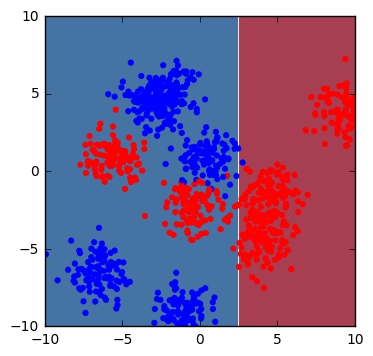

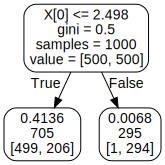

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from tutorial import plot_surface    
from graphviz import Source
from ipywidgets import interact, widgets
from IPython.display import display

@interact(n=widgets.IntSlider(min=2, max=20,step=1,value=2))
def plot_tree(n):
    clf = DecisionTreeClassifier(max_leaf_nodes=n)
    clf.fit(X, y)
    plot_surface(clf, X, y)
    display(Source(export_graphviz(clf, out_file=None, label="root", rounded=True)))

# Gaussian processes

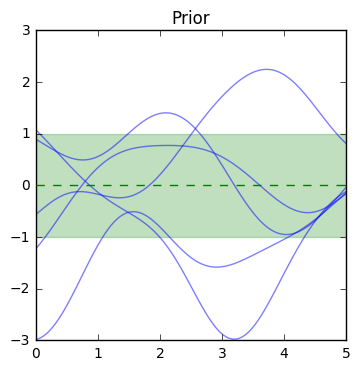

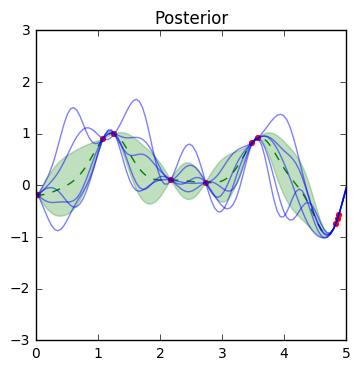

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


# Specify Gaussian Process
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gp = GaussianProcessRegressor(kernel=kernel)

# Plot prior
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'g--', zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.25, color='g')
y_samples = gp.sample_y(X_[:, np.newaxis], 5)
plt.plot(X_, y_samples, "b", alpha=0.5)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Prior")
plt.savefig("gp-prior.pdf")
plt.show()

# Generate data and fit GP
rng = np.random.RandomState(4)
X = rng.uniform(0, 5, 10)[:, np.newaxis]
y = np.sin((X[:, 0] - 2.5) ** 2)
gp.fit(X, y)

# Plot posterior
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'g--')
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.25, color='g')

y_samples = gp.sample_y(X_[:, np.newaxis], 5)
plt.plot(X_, y_samples, "b", alpha=0.5)
plt.scatter(X[:, 0], y, c='r', linewidths=0)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Posterior")
plt.savefig("gp-posterior.pdf")
plt.show()

RBF(length_scale=0.602)


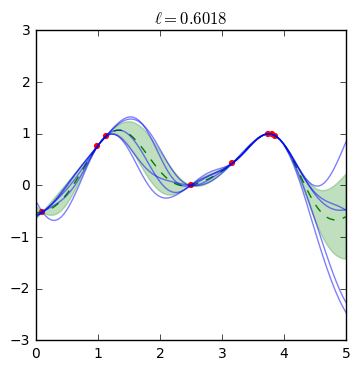

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


# Specify Gaussian Process
kernel = RBF(length_scale=0.1)
gp = GaussianProcessRegressor(kernel=kernel)

# Generate data and fit GP
rng = np.random.RandomState(10)
X = rng.uniform(0, 5, 8)[:, np.newaxis]
y = np.sin((X[:, 0] - 2.5) ** 2)
gp.fit(X, y)

print(gp.kernel_)

# Plot posterior
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'g--')
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.25, color='g')

y_samples = gp.sample_y(X_[:, np.newaxis], 5)
plt.plot(X_, y_samples, "b", alpha=0.5)
plt.scatter(X[:, 0], y, c='r', linewidths=0)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("$\ell=%.4f$" % gp.kernel_.length_scale)
plt.savefig("rbf-ml.pdf")
plt.show()